<a href="https://colab.research.google.com/github/prikshit-2000/Tensorflow/blob/main/Class_Activation_Maps_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import  Dense,GlobalAveragePooling2D,MaxPooling2D,Conv2D,Flatten
import seaborn as sns
import PIL
from tensorflow.keras.utils import plot_model

In [38]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()


In [39]:
X_test.shape,X_train.shape

((10000, 28, 28), (60000, 28, 28))

In [40]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [41]:
X_train  = X_train  / 255.0
X_test= X_test / 255.0
X_train  = X_train.astype('float')
X_test = X_test.astype('float')

In [42]:
def show_image(img):
    image = np.array(img,dtype = 'float')
    image = image.reshape((28,28))
    plt.imshow(image)


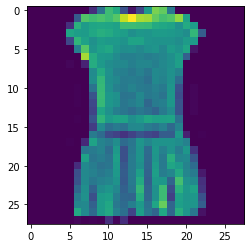

In [43]:
show_image(X_train[3])

In [44]:
model = Sequential()
model.add(Conv2D(16,input_shape = (28,28,1),kernel_size = (3,3) , padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,kernel_size  = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,padding = 'same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128,padding = 'same',kernel_size=(3,3),activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 64)        

In [45]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [46]:
model.fit(X_train,y_train,epochs = 5,batch_size = 32,validation_split = 0.1 , shuffle = True)

Epoch 1/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.6201 - accuracy: 0.7685 - val_loss: 0.4127 - val_accuracy: 0.8428
Epoch 2/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3805 - accuracy: 0.8605 - val_loss: 0.3463 - val_accuracy: 0.8777
Epoch 3/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3175 - accuracy: 0.8844 - val_loss: 0.3133 - val_accuracy: 0.8832
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2806 - accuracy: 0.8972 - val_loss: 0.2685 - val_accuracy: 0.9032
Epoch 5/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2535 - accuracy: 0.9064 - val_loss: 0.2607 - val_accuracy: 0.9078


In [47]:
print(model.layers[-3].name)
print(model.layers[-1].name)

conv2d_11
dense_2


In [48]:
gap_weights = model.layers[-1].get_weights()[0]
print(gap_weights.shape)
cam_model = Model(inputs =model.input ,outputs =(model.layers[-3].output  , model.layers[-1].output  ) )

(128, 10)


In [49]:
cam_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          1849

In [50]:
features,results = cam_model.predict(X_test)
features.shape , results.shape

((10000, 3, 3, 128), (10000, 10))

Predicted Class = 2 Probability  = 0.9865754


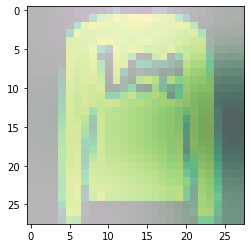

Predicted Class = 2 Probability  = 0.5138678


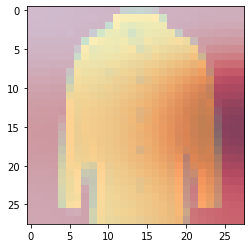

Predicted Class = 2 Probability  = 0.95830387


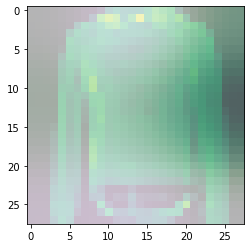

Predicted Class = 2 Probability  = 0.9843464


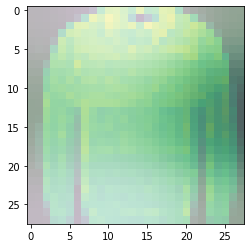

Predicted Class = 2 Probability  = 0.5292323


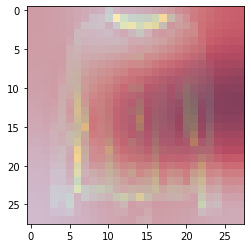

Predicted Class = 2 Probability  = 0.85808265


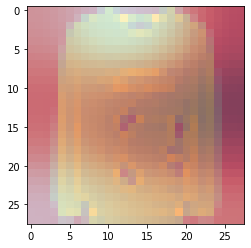

Predicted Class = 2 Probability  = 0.5863779


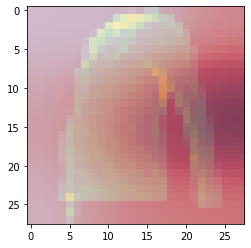

Predicted Class = 2 Probability  = 0.53109294


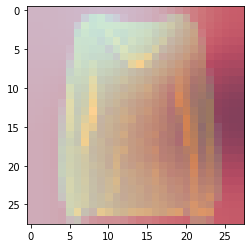

Predicted Class = 2 Probability  = 0.9272666


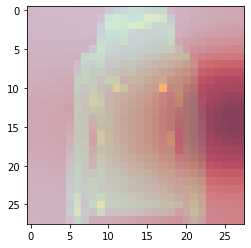

Predicted Class = 2 Probability  = 0.96204156


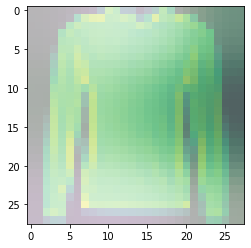

Predicted Class = 2 Probability  = 0.9866651


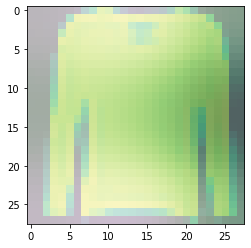

Predicted Class = 2 Probability  = 0.70387846


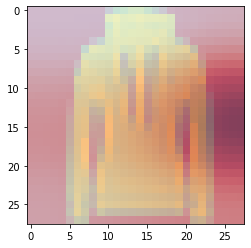

Predicted Class = 2 Probability  = 0.994232


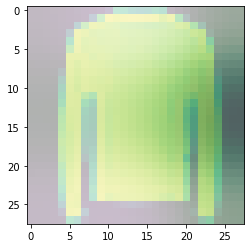

Predicted Class = 2 Probability  = 0.9965198


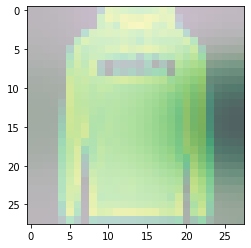

Predicted Class = 2 Probability  = 0.5368951


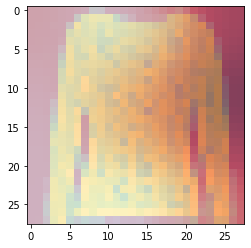

Predicted Class = 2 Probability  = 0.5287736


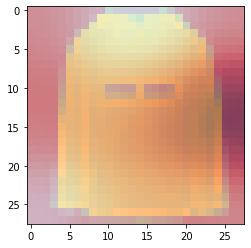

Predicted Class = 2 Probability  = 0.99010897


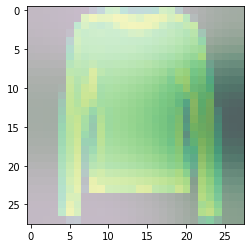

In [63]:
import scipy
def show_cam(i):
    image_index = i
    features_for_img = features[image_index , :,:,:]
    prediction = np.argmax(results[image_index])
    class_activation_weights = gap_weights[:,prediction]
    class_activation_features = scipy.ndimage.zoom(features_for_img,(28/3,28/3,1),order = 2)
    cam_output = np.dot(class_activation_features,class_activation_weights)

    print("Predicted Class = " + str(prediction) + ' Probability  = '  + str(results[image_index][prediction]))
    plt.imshow(np.squeeze(X_test[image_index],-1),alpha = 0.5)

    if results[image_index][prediction] > 0.95:
        cmap_str = 'Greens'
    else:
        cmap_str = 'Reds'

    plt.imshow(cam_output,cmap = cmap_str , alpha = 0.5)
    plt.show()

desired_class = 2
for i in range(0,100):
    if np.argmax(results[i]) == desired_class:
        show_cam(i)



